In [1]:
#!/usr/bin/env python3
# initialization
import importlib
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import transpile

# import basic plot tools
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import utilities as commonUtl
import utilitiesRepetitionCode as utl
importlib.reload(utl)

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True # For latex plots
mpl.rcParams.update({'font.size': 12})
mpl.rcParams.update({'font.family': "Times"})

basis1 = ["h", "s", "sdg", "cx", "t", "cxx", "id"]
basis2 = ["cx", "id", "rz", "sx", "x"]


In [2]:
gate_rep=6
SHOTS=10000

# for gate_rep in gate_reps:
encoding_rep=2
circ = transpile(utl.testcirc_s(gate_rep), basis_gates=basis1, optimization_level=0)
print(circ)
coded_circ = utl.Encodings.to_encoded_circ_test_1Qubit_Gate(circ, encoding_rep)
print(coded_circ)
correct_answer = commonUtl.to_percentages(commonUtl.keys_to_binary(
    commonUtl.execute_circ_with_depol_1q_reptest(circ, 0)))
err_vals = np.linspace(1e-5, 1e-2, 10)
uncoded_sso = []
coded_sso = []
for prob1 in err_vals:
    result_circ = commonUtl.keys_to_binary(commonUtl.to_percentages(commonUtl.execute_circ_with_depol(circ, prob1, SHOTS)))

    result_coded_circ = commonUtl.keys_to_binary(commonUtl.to_percentages(utl.post_select(
                        commonUtl.execute_circ_with_depol_1q_reptest(coded_circ, prob1), 2)))

    uncoded_sso.append(commonUtl.get_sso(result_circ, correct_answer))
    coded_sso.append(commonUtl.get_sso(result_coded_circ, correct_answer))
    print(result_circ)
    print(result_coded_circ)


        ┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐ ░ ┌─┐
     q: ┤ S ├┤ Sdg ├┤ S ├┤ Sdg ├┤ S ├┤ Sdg ├─░─┤M├
        └───┘└─────┘└───┘└─────┘└───┘└─────┘ ░ └╥┘
meas: 1/════════════════════════════════════════╩═
                                                0 
      ┌───┐┌─────┐┌───┐┌─────┐┌───┐┌─────┐ ░ ┌─┐   
q4_0: ┤ S ├┤ Sdg ├┤ S ├┤ Sdg ├┤ S ├┤ Sdg ├─░─┤M├───
      ├───┤└┬───┬┘├───┤└┬───┬┘├───┤└┬───┬┘ ░ └╥┘┌─┐
q4_1: ┤ I ├─┤ I ├─┤ I ├─┤ I ├─┤ I ├─┤ I ├──░──╫─┤M├
      └───┘ └───┘ └───┘ └───┘ └───┘ └───┘  ░  ║ └╥┘
c0: 2/════════════════════════════════════════╩══╩═
                                              0  1 
{'0b0': 1.0}
{'0b0': 1.0}
{'0b0': 0.9968, '0b1': 0.0032}
{'0b0': 1.0}
{'0b0': 0.9928, '0b1': 0.0072}
{'0b0': 1.0}
{'0b0': 0.9885, '0b1': 0.0115}
{'0b0': 0.9998982912937348, '0b1': 0.0001017087062652563}
{'0b0': 0.9857, '0b1': 0.0143}
{'0b0': 0.9997948297086582, '0b1': 0.0002051702913418137}
{'0b0': 0.9853, '0b1': 0.0147}
{'0b0': 0.999689858368655, '0b1': 0.00031014163134498085}


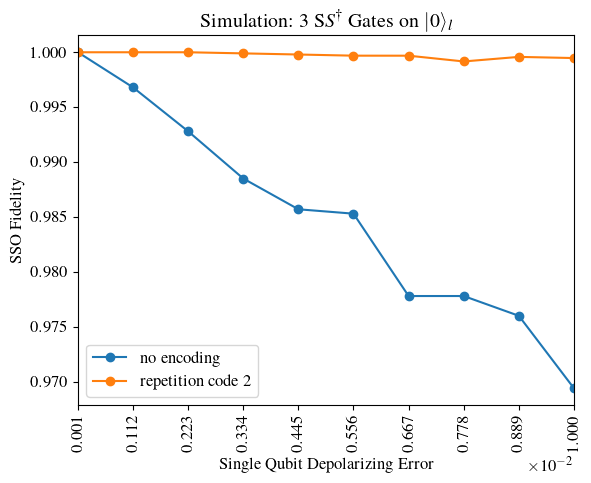

not encoded ssso: [1.0, 0.9968, 0.9927999999999999, 0.9884999999999999, 0.9857, 0.9853000000000001, 0.9778000000000001, 0.9778000000000001, 0.9760000000000001, 0.9693999999999999]
encoded ssso: [1.0, 1.0, 1.0, 0.9998982912937346, 0.9997948297086582, 0.999689858368655, 0.9996874674445256, 0.9991625667329634, 0.9995785924989464, 0.9994722398142283]


In [4]:
fig, ax = plt.subplots()
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlim([err_vals[0], err_vals[-1]])
plt.xticks(err_vals, rotation=90)
# ax.xaxis.set_major_formatter(mtick.FormatStrFormatter('%2.2e'))
plt.plot(err_vals, uncoded_sso, label="no encoding", marker="o")
plt.plot(err_vals, coded_sso, label=f"repetition code {encoding_rep}", marker="o")
plt.ylabel('SSO Fidelity')
plt.xlabel("Single Qubit Depolarizing Error")
plt.title(f"Simulation: {gate_rep//2} S$S^\dagger$ Gates on " + r"$|0\rangle_l$")
plt.legend()
plt.show()
print(f"not encoded ssso: {uncoded_sso}")
print(f"encoded ssso: {coded_sso}")